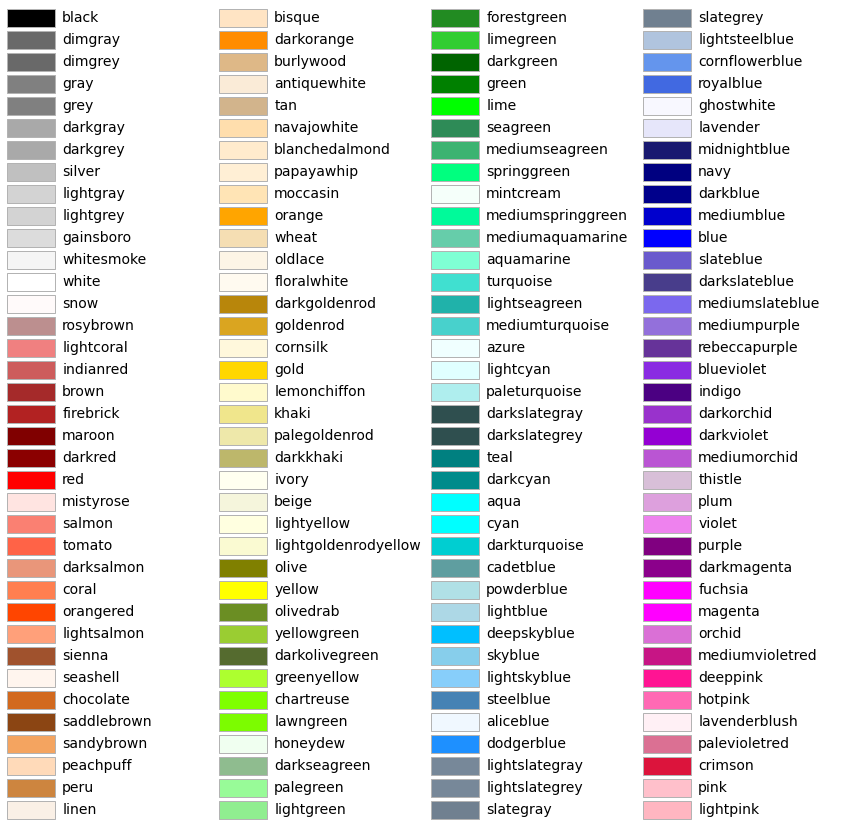

In [13]:
import math
import mne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [14]:
parietal_channels = [
    #L
    "MEG0412","MEG0413",
    "MEG0423","MEG0422",
    "MEG0632","MEG0633",

    "MEG0442","MEG0443",
    "MEG0433","MEG0432",
    "MEG0712","MEG0713",

    "MEG1812","MEG1813",
    "MEG1823","MEG1822",
    "MEG0742","MEG0743",

    "MEG1633","MEG1622",
    "MEG1842","MEG1843",
    "MEG1833","MEG1832",
    "MEG2012","MEG2013",
    #R
    "MEG1042","MEG1043",
    "MEG1113","MEG1112",
    "MEG1122","MEG1123",

    "MEG0722","MEG0723",
    "MEG1143","MEG1142",
    "MEG1132","MEG1133",

    "MEG0732","MEG0733",
    "MEG2213","MEG2212",
    "MEG2222","MEG2223",

    "MEG2243","MEG2242",
    "MEG2022","MEG2023",
    "MEG2232","MEG2233",
    "MEG2443","MEG2442",
]

In [15]:
frontal_channels = [
    "MEG0123","MEG0122",

    "MEG0342","MEG0343",

    "MEG0312","MEG0313",
    "MEG0323","MEG0322",

    "MEG0512","MEG0513",
    "MEG0543","MEG0542",
    "MEG0332","MEG0333",
    
    "MEG0522","MEG0523",
    "MEG0533","MEG0532",
    "MEG0612","MEG0613",
    "MEG0643","MEG0642",

    "MEG0812","MEG0813",
    "MEG0823","MEG0822",
    "MEG1012","MEG1013",
    "MEG0623","MEG0622",

    "MEG0912","MEG0913",
    "MEG0943","MEG0942",
    "MEG1022","MEG1023",
    "MEG1033","MEG1032",

    "MEG0922","MEG0923",
    "MEG0933","MEG0932",
    "MEG1242","MEG1243",

    "MEG1212","MEG1213",
    "MEG1233","MEG1232",

    "MEG1222","MEG1223",
    
    "MEG1413","MEG1412"
]

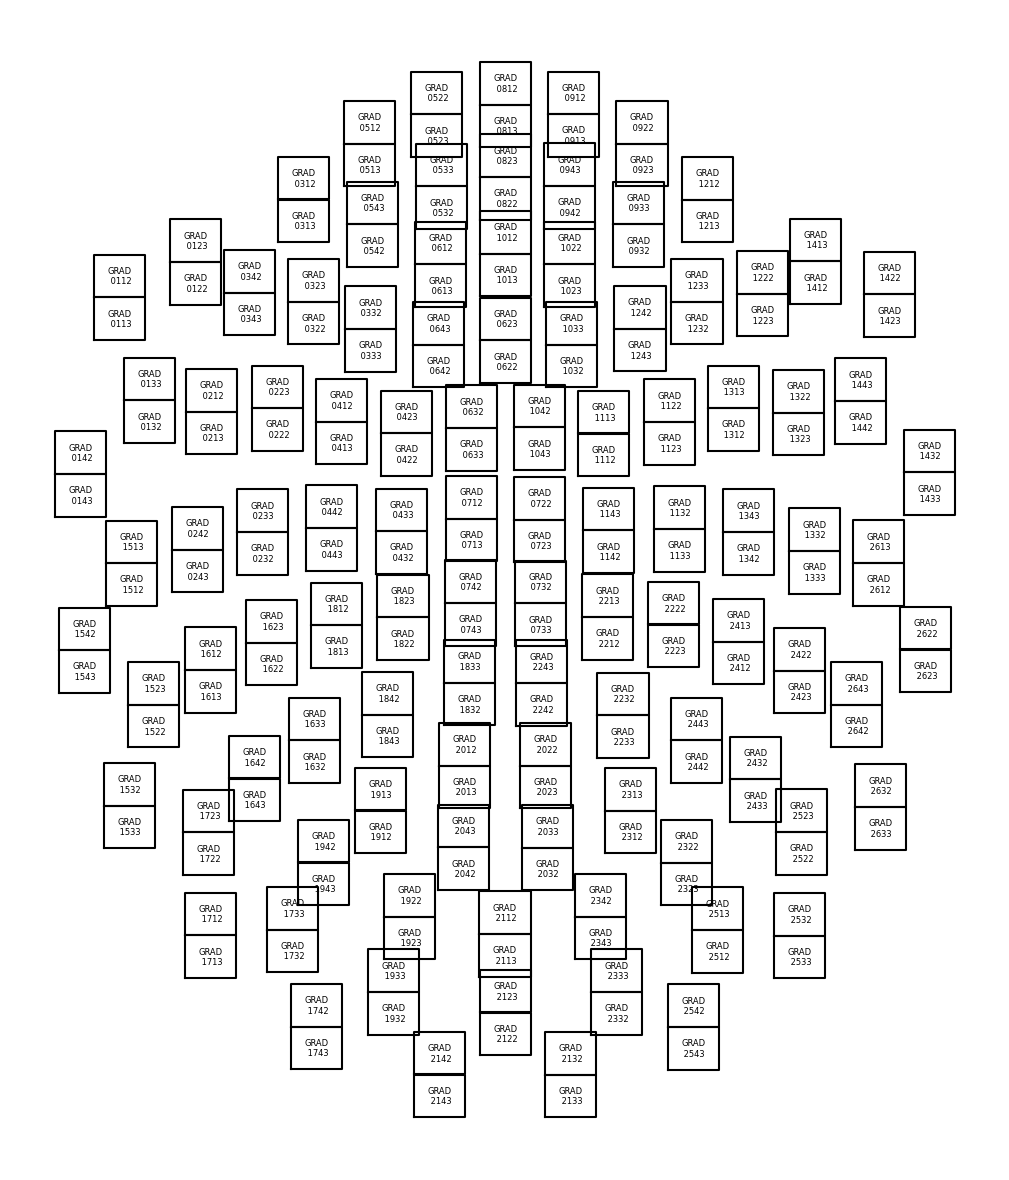

In [16]:
layout = mne.channels.read_layout("Vectorview-grad")
fig, ax = plt.subplots(1, 1, figsize=(16.53, 11.69), layout="constrained")
ax.set(xticks=[], yticks=[], aspect="equal")
outlines = dict(border=([0, 1, 1, 0, 0], [0, 0, 1, 1, 0]))
for p, ch_name in zip(layout.pos, layout.names, strict=True):
    center_pos = np.array((p[0] + p[2] / 2.0, p[1] + p[3] / 2.0))
    ch_name = ch_name.split("MEG")[1]
    ch_name = f"MAG\n{ch_name}" if ch_name.endswith("1") else f"GRAD\n{ch_name}"
    ax.annotate(
        ch_name,
        xy=center_pos,
        horizontalalignment="center",
        verticalalignment="center",
        size=6,
    )
    x1, x2, y1, y2 = p[0], p[0] + p[2], p[1], p[1] + p[3]
    ax.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], color="k")
ax.axis("off")
plt.show()

In [1]:
import mne
meg_filename = rf"L:\Common\Users\Qiaoyue\MEG_project\Data\F120\MEG\part1.fif"
raw= mne.io.read_raw_fif(meg_filename, preload=True, verbose = False)


C:\Users\raude\AppData\Local\Temp\ipykernel_3292\1260735161.py:3: RuntimeWarning: This filename (L:\Common\Users\Qiaoyue\MEG_project\Data\F120\MEG\part1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw= mne.io.read_raw_fif(meg_filename, preload=True, verbose = False)


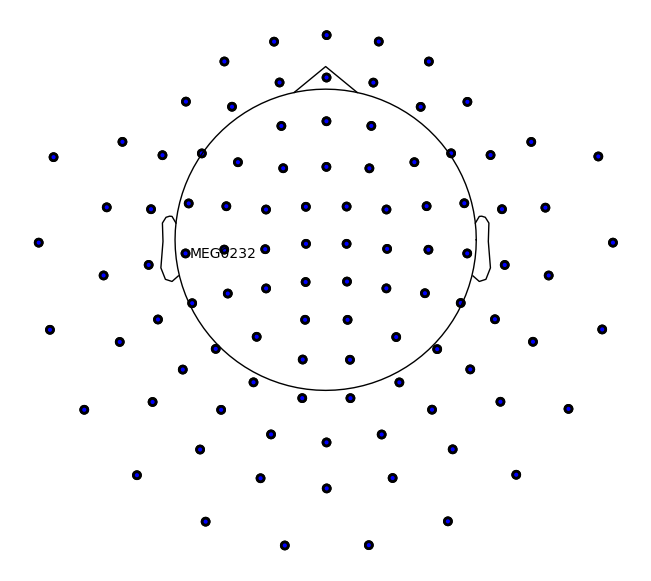

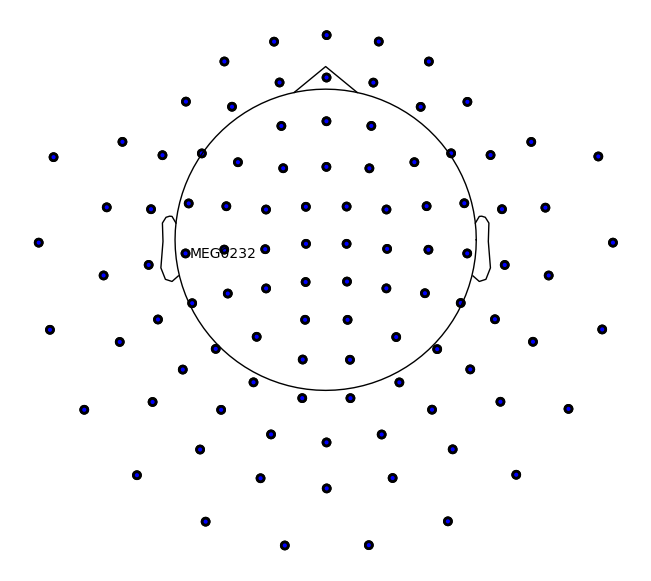

In [5]:
mne.viz.plot_sensors(raw.info,kind="topomap", ch_type = "grad", show_names = ["MEG0232"],to_sphere=True)

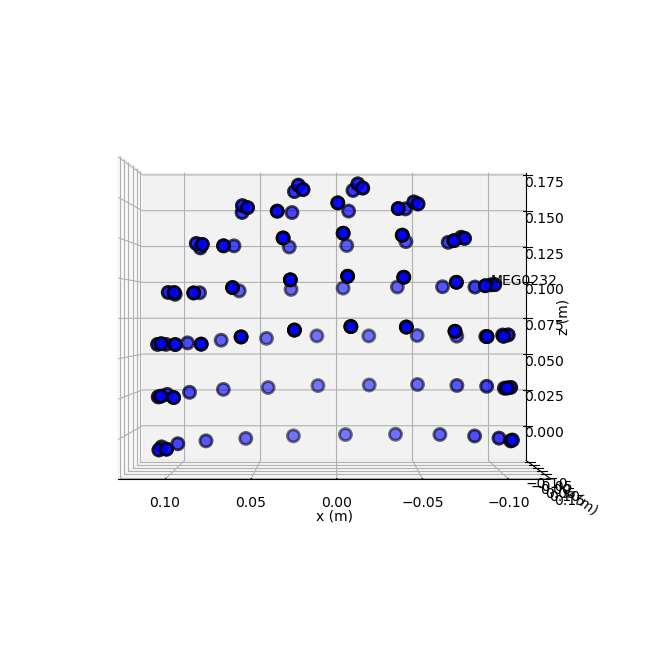

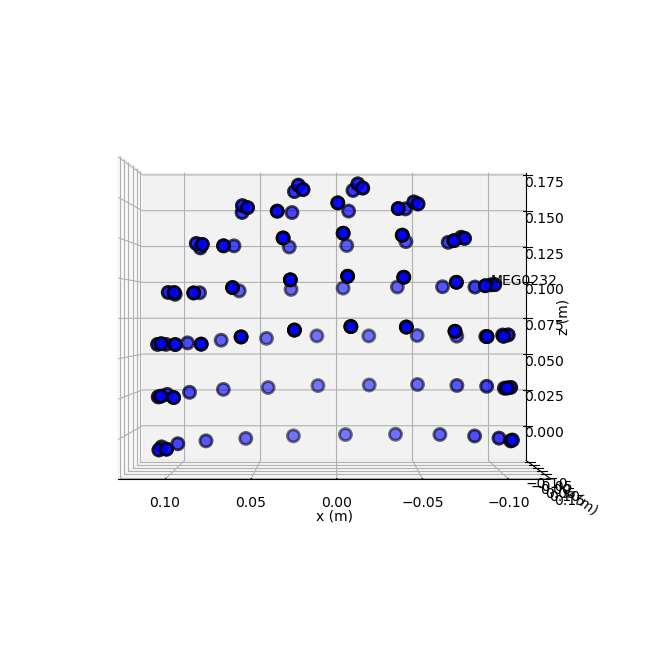

In [6]:
mne.viz.plot_sensors(raw.info,kind="3d", ch_type = "grad", show_names = ["MEG0232"],to_sphere=True)